In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
from math import pi
from matplotlib_venn import venn2, venn3

In [6]:
def ask_more_values(value):
    """
    Ask the user if they would like to add an additional value
    """ 
    resp = 'yes'
    counter = 0
    while len(resp) > 1 and counter < 3:
        if counter == 0:
            resp = input(f'Would you like to add another {value}? (Y/N)\n')
            counter += 1
        elif counter < 3:
            resp = input('Sorry, I didn\'t understand that. Please enter "Y" or "N".\n')
            counter += 1
        else:
            print('I\'m, having a hard time understanding you. Please try again later.')
            resp = 'quit'
            break
    
    return resp

In [7]:
def get_feature_list():
    """
    Ask the user to enter a feature
    """
    # artificial max number of features
    n = 10
    
    # At least one feature is requested
    feature_list = []
    feature_list.append(input('Please enter a feature you will use to make your decsision:\n'))
    
    # Set initial response
    resp = ask_more_values('feature')

    # More features are requested one at a time
    while resp.lower() == 'y' and len(feature_list) < n:
        feature_list.append(input('Please enter a feature you will use to make your decsision:\n'))
        resp = ask_more_values('feature')
    
    return feature_list

In [67]:
# Test function

feature_list = get_feature_list()
feature_list

Please enter a feature you will use to make your decsision:
feature1
Would you like to add another feature? (Y/N)
y
Please enter a feature you will use to make your decsision:
feature2
Would you like to add another feature? (Y/N)
y
Please enter a feature you will use to make your decsision:
feature3
Would you like to add another feature? (Y/N)
y
Please enter a feature you will use to make your decsision:
feature4
Would you like to add another feature? (Y/N)
y
Please enter a feature you will use to make your decsision:
feature5
Would you like to add another feature? (Y/N)
n


['feature1', 'feature2', 'feature3', 'feature4', 'feature5']

In [9]:
def set_feature_importance(feature_list):
    """
    Set the importance of each feature
    """
    # Total for feature importances should add up to a round number
    num_features = len(feature_list)
    if num_features==1:
        df.iloc[0,'importance']=1
        return df
    elif num_features<10:
        total_importance = 10
    else:
        total_importance = 100
        
    print(f'Imagine you have {total_importance} points to assign to your {num_features} features.\n')
    print(f'Assign a nonnegative whole number to each of the following features making sure the total sums to {total_importance}.')
    np.random.shuffle(feature_list)
    feature_dict = {}
    points_used = 0
    for index, feature in enumerate(feature_list):
        print(f'You have {total_importance - points_used} points left,')
        print(f'and {num_features - index} more features to value.\n')
        time.sleep(1)
        try:
            feature_dict[feature] = input(f'How much do you value {feature}?\t')
            feature_dict[feature] = {'value': int(feature_dict[feature]), 'percent': int(feature_dict[feature])/total_importance}
            points_used += feature_dict[feature]['value']
        except:
            print('You must enter a whole number')
            feature_dict[feature] = input(f'How much do you value {feature}?\t')
            feature_dict[feature] = {'value': int(feature_dict[feature]), 'percent': int(feature_dict[feature])/total_importance}
            points_used += feature_dict[feature]['value']
            
    return feature_dict

In [68]:
# Test function
feature_dict = set_feature_importance(feature_list)
feature_dict

Imagine you have 10 points to assign to your 5 features.

Assign a nonnegative whole number to each of the following features making sure the total sums to 10.
You have 10 points left,
and 5 more features to value.

How much do you value feature3?	2
You have 8 points left,
and 4 more features to value.

How much do you value feature4?	2
You have 6 points left,
and 3 more features to value.

How much do you value feature2?	2
You have 4 points left,
and 2 more features to value.

How much do you value feature5?	2
You have 2 points left,
and 1 more features to value.

How much do you value feature1?	2


{'feature3': {'value': 2, 'percent': 0.2},
 'feature4': {'value': 2, 'percent': 0.2},
 'feature2': {'value': 2, 'percent': 0.2},
 'feature5': {'value': 2, 'percent': 0.2},
 'feature1': {'value': 2, 'percent': 0.2}}

In [12]:
def get_option_list():
    """
    Ask the user to enter an option
    """
    # artificial max number of features
    n = 5
    
    # At least one feature is requested
    option_list = []
    option_list.append(input('Please enter the first option you need to compare:\n'))
    
    # Set initial response
    resp = ask_more_values('option')

    # More features are requested one at a time
    while resp.lower() == 'y' and len(option_list) < n:
        option_list.append(input('Please enter the next option you are comparing:\n'))
        resp = ask_more_values('option')
    
    return option_list

In [69]:
# Test function
option_list = get_option_list()
option_list

Please enter the first option you need to compare:
alpha
Would you like to add another option? (Y/N)
y
Please enter the next option you are comparing:
beta
Would you like to add another option? (Y/N)
y
Please enter the next option you are comparing:
gamma
Would you like to add another option? (Y/N)
n


['alpha', 'beta', 'gamma']

In [14]:
def rate_each_option(feature_list, option_list):
    """
    rate each feature in each option
    """
    option_dict = {}
    for option in option_list:
        feature_rating_dict = {}
        for feature in feature_list:
            feature_rating_dict[feature] = int(input(f'How do you rate {option} in terms of {feature}?\n'))
        option_dict[option] = feature_rating_dict
        
    return option_dict

In [70]:
# Test function

option_dict = rate_each_option(feature_list, option_list)
option_dict

How do you rate alpha in terms of feature3?
1
How do you rate alpha in terms of feature4?
2
How do you rate alpha in terms of feature2?
3
How do you rate alpha in terms of feature5?
4
How do you rate alpha in terms of feature1?
5
How do you rate beta in terms of feature3?
5
How do you rate beta in terms of feature4?
4
How do you rate beta in terms of feature2?
3
How do you rate beta in terms of feature5?
2
How do you rate beta in terms of feature1?
1
How do you rate gamma in terms of feature3?
3
How do you rate gamma in terms of feature4?
3
How do you rate gamma in terms of feature2?
3
How do you rate gamma in terms of feature5?
3
How do you rate gamma in terms of feature1?
3


{'alpha': {'feature3': 1,
  'feature4': 2,
  'feature2': 3,
  'feature5': 4,
  'feature1': 5},
 'beta': {'feature3': 5,
  'feature4': 4,
  'feature2': 3,
  'feature5': 2,
  'feature1': 1},
 'gamma': {'feature3': 3,
  'feature4': 3,
  'feature2': 3,
  'feature5': 3,
  'feature1': 3}}

In [71]:
pd.DataFrame.from_dict(option_dict)

,alpha,beta,gamma
feature1,5,1,3
feature2,3,3,3
feature3,1,5,3
feature4,2,4,3
feature5,4,2,3


In [17]:
pd.DataFrame(feature_dict).T

,percent,value
feature1,0.3,3.0
feature2,0.4,4.0
feature3,0.3,3.0


In [72]:
option_value_df = pd.DataFrame.from_dict(option_dict).merge(pd.DataFrame(feature_dict).T, left_index=True, right_index=True)

In [19]:
def print_scores(option_value_df, option_list):
    for option in option_list:
        total = option_value_df[option]*option_value_df['percent']
        print(f'{option}: ', total.sum()/10)
    return

In [73]:
print_scores(option_value_df, option_list)

alpha:  0.3
beta:  0.3
gamma:  0.30000000000000004


In [74]:
option_value_df

,alpha,beta,gamma,percent,value
feature1,5,1,3,0.2,2.0
feature2,3,3,3,0.2,2.0
feature3,1,5,3,0.2,2.0
feature4,2,4,3,0.2,2.0
feature5,4,2,3,0.2,2.0


In [22]:
def dual_radar_plot(df, comparison_pair):
    """
    Make a radar plot comparing feature values of two options
    """
    # ------- PART 1: Create background
    feature_list = df.index.values

    # number of variable
    N = len(feature_list)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], feature_list)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2, 4, 6, 8], ["2", "4", "6", "8"], color="grey", size=7)
    plt.ylim(0, 10)


    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
    for option in comparison_pair:
        values = df[option].values.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=option)
        ax.fill(angles, values, 'b', alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

In [23]:
def get_options_for_radar(option_list):
    """
    Gets 1 or 2 options for the radar plot
    """
    print('Choose up to two options to compare on a radar plot. ')
    print('Remember, the list of options are:\n')
    print(*option_list, sep="\n")
    comparison_list = ['none']
    counter = 0
    time.sleep(1)
    while comparison_list[0] not in option_list:
        comparison_list[0] = input('Enter the first option to compare:\n')
        counter += 1
        if counter > 3:
            print('Sorry, I missed that. I\'ll use the first option.')
            comparison_list[0] = option_list[0]
            break
    
    comparison_list.append(input('Enter the second option to compare, or type "none":\n'))
    while comparison_list[1] not in option_list:
        comparison_list[1] = input('Enter the first option to compare:\n')
        counter += 1
        if counter > 3:
            print('Sorry, I missed that. We\'ll skip this option.')
            comparison_list[1] = 'none'
            break
    
    if comparison_list[1] == 'none':
        return comparison_list[0]
    return comparison_list

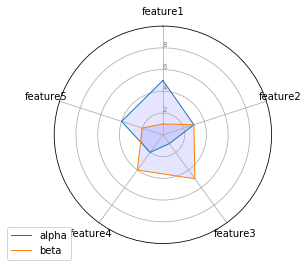

In [75]:
dual_radar_plot(option_value_df, ['alpha', 'beta'])

In [77]:
def create_venn2(df, comparison_pair):
    """
    Create a 2 circle Venn Diagram
    """
    
    list_of_dicts = df[comparison_pair].T.to_dict('records')
    list_of_strings = []
    for key, value in list_of_dicts[0].items():
        list_of_strings.append(str(key)+':'+str(value))
    set_A = set(list_of_strings)
    
    list_of_strings = []
    for key, value in list_of_dicts[1].items():
        list_of_strings.append(str(key)+':'+str(value))
    set_B = set(list_of_strings)
    
    list_of_sets = [set_A, set_B]

    v = venn2(list_of_sets, set_labels=comparison_pair)
    
    alpha_strings = list(set_B.difference(set_A))
    v.get_label_by_id('01').set_text('\n'.join(alpha_strings))
    
    beta_strings = list(set_A.difference(set_B))
    v.get_label_by_id('10').set_text('\n'.join(beta_strings))
    
    intersection_strings = list(set_B.intersection(set_A))
    v.get_label_by_id('11').set_text('\n'.join(intersection_strings))
    
    plt.title('Venn Diagram')
    plt.show()
    
    return

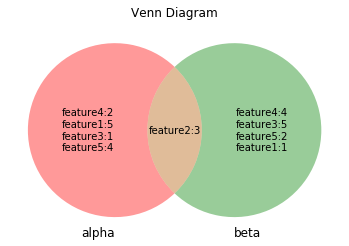

In [78]:
create_venn2(option_value_df, ['alpha', 'beta'])

In [82]:
def create_venn3(df, comparison_triple):
    """
    Create a 3 circle venn diagram
    """
    list_of_dicts = df[comparison_triple].T.to_dict('records')
    list_of_strings = []
    for key, value in list_of_dicts[0].items():
        list_of_strings.append(str(key)+':'+str(value))
    set_A = set(list_of_strings)
    
    list_of_strings = []
    for key, value in list_of_dicts[1].items():
        list_of_strings.append(str(key)+':'+str(value))
    set_B = set(list_of_strings)
    
    list_of_strings = []
    for key, value in list_of_dicts[2].items():
        list_of_strings.append(str(key)+':'+str(value))
    set_C = set(list_of_strings)
    
    list_of_sets = [set_A, set_B, set_C]
    
    
    v=venn3(subsets = (10, 8, 22, 6,9,4,2), set_labels = comparison_triple)
    
    strings_001 = list(set_C.difference(set_A).difference(set_B))
    v.get_label_by_id('001').set_text('\n'.join(strings_001))
    
    strings_010 = list(set_B.difference(set_A).difference(set_C))
    v.get_label_by_id('010').set_text('\n'.join(strings_010))
    
    strings_100 = list(set_A.difference(set_B).difference(set_C))
    v.get_label_by_id('100').set_text('\n'.join(strings_100))
    
    strings_011 = list(set_B.intersection(set_C).difference(set_A))
    v.get_label_by_id('011').set_text('\n'.join(strings_011))
    
    strings_101 = list(set_A.intersection(set_C).difference(set_B))
    v.get_label_by_id('101').set_text('\n'.join(strings_101))
    
    strings_110 = list(set_A.intersection(set_B).difference(set_C))
    v.get_label_by_id('110').set_text('\n'.join(strings_110))
    
    strings_111 = list(set_A.intersection(set_B).intersection(set_C))
    v.get_label_by_id('111').set_text('\n'.join(strings_111))
    
    
    plt.title('Venn Diagram')
    
    plt.show()
    
    return list_of_sets

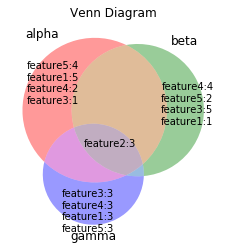

[{'feature1:5', 'feature2:3', 'feature3:1', 'feature4:2', 'feature5:4'},
 {'feature1:1', 'feature2:3', 'feature3:5', 'feature4:4', 'feature5:2'},
 {'feature1:3', 'feature2:3', 'feature3:3', 'feature4:3', 'feature5:3'}]

In [83]:
create_venn3(option_value_df, ['alpha', 'beta', 'gamma'])